<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("data_sets/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
# Group by department to see leaving rate
dept_left = df.groupby('Department')['left'].agg(['sum', 'count', 'mean'])
dept_left.columns = ['employees_left', 'total_employees', 'leaving_rate']
dept_left = dept_left.sort_values('leaving_rate', ascending=False)
dept_left

,employees_left,total_employees,leaving_rate
Department,,,
hr,215,739,0.290934
accounting,204,767,0.265971
technical,697,2720,0.256250
support,555,2229,0.248991
sales,1014,4140,0.244928
marketing,203,858,0.236597
IT,273,1227,0.222494
product_mng,198,902,0.219512
RandD,121,787,0.153748


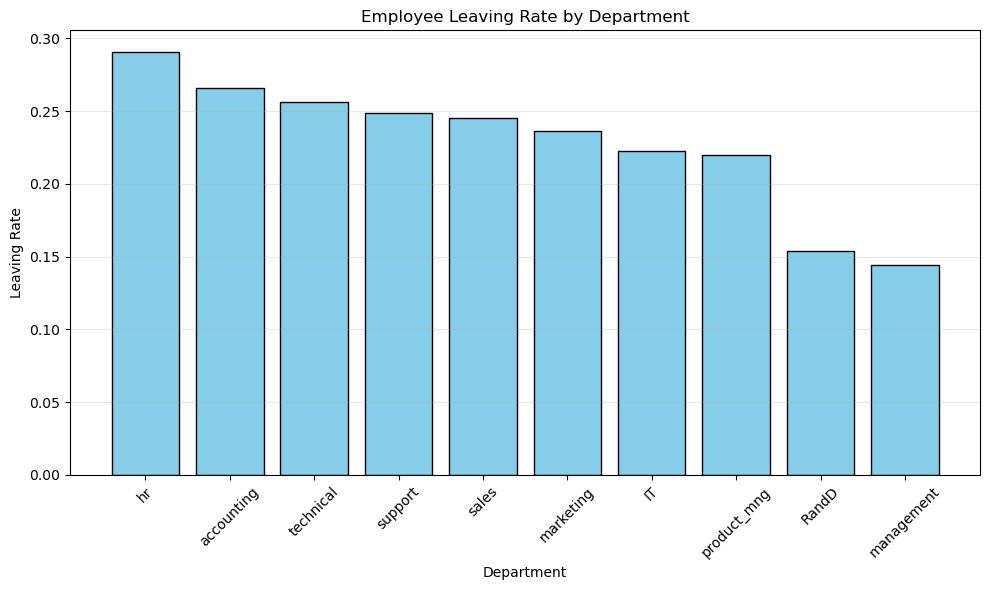

In [10]:
# Visualize leaving rate by department
plt.figure(figsize=(10, 6))
plt.bar(dept_left.index, dept_left['leaving_rate'], color='skyblue', edgecolor='black')
plt.xlabel('Department')
plt.ylabel('Leaving Rate')
plt.title('Employee Leaving Rate by Department')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

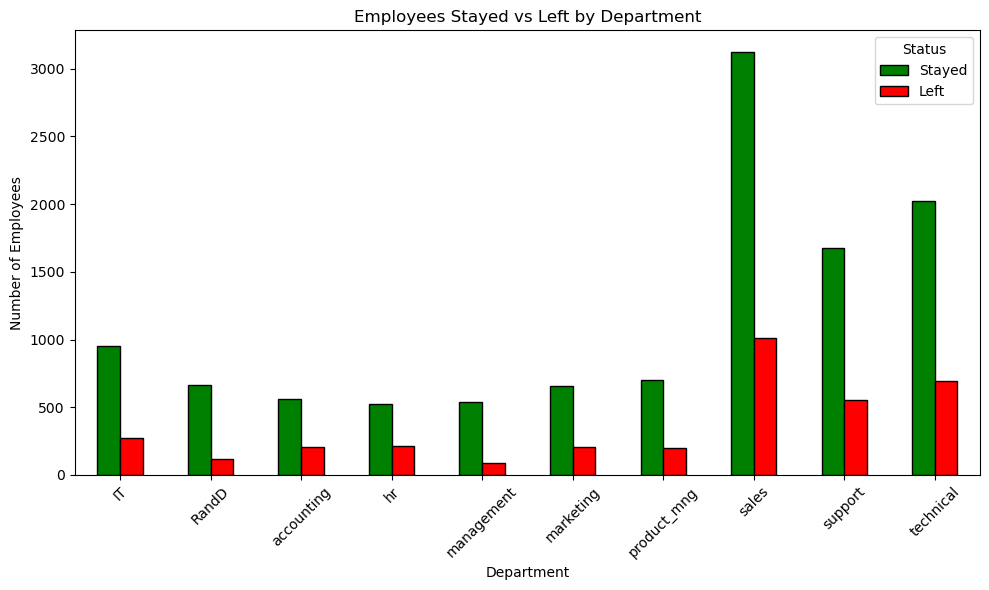

In [11]:
# Create a grouped bar chart showing stayed vs left by department
dept_summary = df.groupby(['Department', 'left']).size().unstack(fill_value=0)
dept_summary.columns = ['Stayed', 'Left']

dept_summary.plot(kind='bar', figsize=(10, 6), color=['green', 'red'], edgecolor='black')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Employees Stayed vs Left by Department')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [12]:
# let us look at the salary and see if if it has any impact on leaving the company
salary_left = df.groupby('salary')['left'].agg(['sum', 'count', 'mean'])
salary_left.columns = ['employees_left', 'total_employees', 'leaving_rate']
salary_left = salary_left.sort_values('leaving_rate', ascending=False)
salary_left

,employees_left,total_employees,leaving_rate
salary,,,
low,2172,7316,0.296884
medium,1317,6446,0.204313
high,82,1237,0.066289


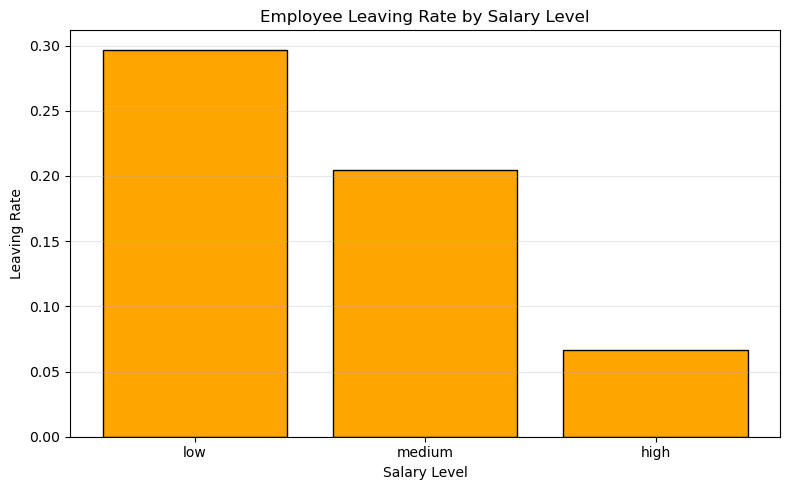

In [13]:
# plot the salary vs leaving rate
plt.figure(figsize=(8, 5))
plt.bar(salary_left.index, salary_left['leaving_rate'], color='orange', edgecolor='black')
plt.xlabel('Salary Level')
plt.ylabel('Leaving Rate')
plt.title('Employee Leaving Rate by Salary Level')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

From the above plot, it is seen that that employees with lower salaries tends to leave the company more, followed by employees with medium salaries. 

In [17]:
# lets see the relation between the department and the salaries.
dept_salary = df.groupby(['Department', 'salary']).size().unstack(fill_value=0)
dept_salary

salary,high,low,medium
Department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Looking at the table showing the relationship between department and salary levels, here's what the data reveals:

**Sales department** dominates in absolute numbers across all salary levels:
- 2,099 employees with high salary
- 1,772 employees with low salary  
- 269 employees with medium salary

This makes sense since sales is the largest department overall.

**Key observations:**

1. **Low salary employees** are most common in sales (1,772), technical (1,147), and support (1,146) departments

2. **High salary employees** are concentrated in sales (2,099), technical (1,372), and support (451)

3. **Medium salary is relatively rare** across all departments - the highest is in management (225) and sales (269)

4. **Smaller departments** like HR, accounting, and RandD have more balanced salary distributions with smaller numbers overall

5. **IT and management** departments have relatively more high-salary positions compared to low-salary ones, suggesting these are more senior/specialized roles

When you combine this with the earlier analysis showing that **low salary employees have the highest leaving rate**, you can infer that:
- Sales, technical, and support departments likely experience higher turnover in their low-salary employee segments
- This explains why these departments show significant numbers of people leaving despite having moderate overall leaving rates

This cross-analysis helps identify that **salary level within departments** is a critical factor for employee retention.

In [18]:
# Now lets see the relation between the departments, promotions and leaving the company
dept_promo_left = df.groupby(['Department', 'promotion_last_5years', 'left']).size().unstack(fill_value=0)
dept_promo_left.columns = ['Stayed', 'Left']
dept_promo_left

Stayed  Left
Department  promotion_last_5years              
IT          0                         954   270
            1                           0     3
RandD       0                         639   121
            1                          27     0
accounting  0                         549   204
            1                          14     0
hr          0                         509   215
            1                          15     0
management  0                         473    88
            1                          66     3
marketing   0                         612   203
            1                          43     0
product_mng 0                         704   198
sales       0                        3033  1007
            1                          93     7
support     0                        1657   552
            1                          17     3
technical   0                        1998   694
            1                          25     3

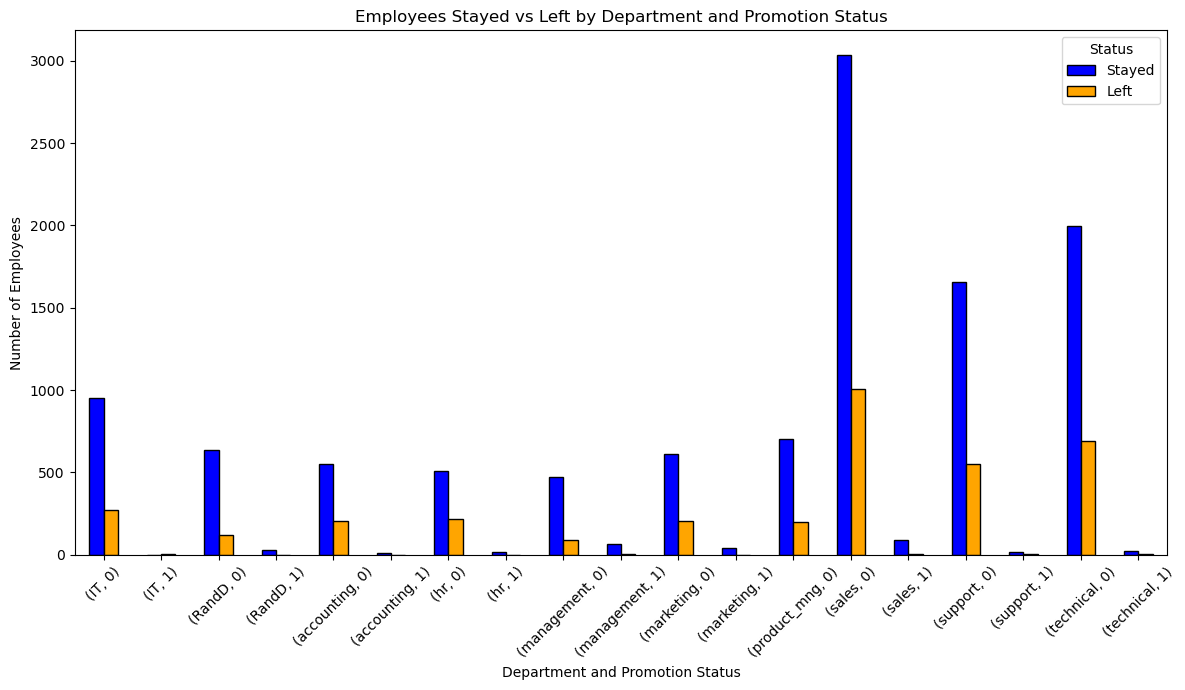

In [19]:
# now lets visualize the relationship between deptartments, promotions and leaving the company
dept_promo_left.plot(kind='bar', figsize=(12, 7), color=['blue', 'orange'], edgecolor='black')
plt.xlabel('Department and Promotion Status')
plt.ylabel('Number of Employees')
plt.title('Employees Stayed vs Left by Department and Promotion Status')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Looking at both the table and visualization showing the relationship between departments, promotions, and employee retention, here are the key insights:

**Understanding the data structure:**
- Each department is split into two groups: employees who got promoted in the last 5 years (1) and those who didn't (0)
- For each group, we see how many stayed vs. left

**Critical findings:**

1. **Promotions are RARE across all departments** - The vast majority of employees (shown by "0" in promotion status) haven't received promotions in the last 5 years

2. **Non-promoted employees leave in large numbers:**
   - Sales (0 promotions): 3,033 stayed, 1,007 left
   - Technical (0 promotions): 1,998 stayed, 694 left  
   - Support (0 promotions): 1,657 stayed, 552 left

3. **Promoted employees have MUCH better retention:**
   - Sales (1 promotion): 93 stayed, only 7 left
   - Technical (1 promotion): 25 stayed, only 3 left
   - Most departments with promotions show minimal leaving

4. **The visualization clearly shows** the blue bars (stayed) are overwhelmingly dominant for promoted employees, while non-promoted employees have substantial orange bars (left)

**Key takeaway:** 
**Lack of promotions is a major driver of employee turnover.** Employees who receive promotions are far more likely to stay, but very few employees are actually getting promoted. This suggests that increasing promotion opportunities could significantly improve retention across all departments, especially in high-turnover areas like sales, technical, and support.